# Introdução ao pandas

## Criando uma estrutura de dados

Assim como podemos usar o excel para armazenar dados em planilhas, podemos utilizar o pandas para armazenar os dados de forma estruturada em linhas e colunas.
Observe o exemplo abaixo onde iremos criar uma planilha com nome e idade

In [1]:
import pandas as pd

df = pd.DataFrame([
 {"nome": "João", "idade": 20},
 {"nome": "Elena", "idade": 25}   
])

Ao utilizar o pandas, DataFrame é o equivalente uma planilha. Para exibir o conteúdo de um dataframe aqui no Jupyter lab, podemos utilizar a função **display**

In [2]:
display(df)

,nome,idade
0,João,20
1,Elena,25


Cada coluna possui um tipo seu próprio tipo de dados. Qual o tipo de dados de uma coluna, podemos utilizar a função **info()**. Observe que string são apresentada como **object**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    2 non-null      object
 1   idade   2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


## Carregando dados de planilhas

Podemos utilizar o panads para carregar dados de planilhas ou arquivos. Vamos ver um exemplo onde os dados dos preços de fechamentos do IBOV são carregados a partir de um arquivo CSV. Isto pode ser feito através da função **read_csv**. Se quisessemos ler uma planilha do Excel, poderiamos utilizar a função read_excel

In [4]:
precos = pd.read_csv('bvsp.csv')

In [5]:
display(precos)

,date,price
0,1/2/2015,48512.0
1,1/5/2015,47517.0
2,1/6/2015,48001.0
3,1/7/2015,49463.0
4,1/8/2015,49943.0
...,...,...
1375,7/27/2020,104477.0
1376,7/28/2020,104109.0
1377,7/29/2020,NaN
1378,7/30/2020,105009.0


Observe que temos uma grande quantidade de dados no nosso DataFrame, para ser exato, são 1380 linhas. Quando utilizamos a função display, nos é exibido os primeiros e os ultimos dados apenas. Caso queiramos ver estes dados de forma mais detalhada, podemos utilizar a função head e tail, conforme a seguir:

In [7]:
# para ver as três primeiras linhas
precos.head(5)

,date,price
0,1/2/2015,48512.0
1,1/5/2015,47517.0
2,1/6/2015,48001.0
3,1/7/2015,49463.0
4,1/8/2015,49943.0


In [8]:
# para ver as três últimas linhas
precos.tail(3)

,date,price
1377,7/29/2020,NaN
1378,7/30/2020,105009.0
1379,7/31/2020,103001.0


Como pode ser visto, nossa coluna *date* está apresentando a data em um formato diferente do habitual, onde o mês aparece antes do dia. Para corrigir este problema, precisamos checar se nossa coluna está sendo interpretada como datetime ou string

In [9]:
precos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1380 non-null   object 
 1   price   1379 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.7+ KB


Podemos nota que nossa coluna date é do tipo string (object). Precisamos convertê-la para data, através do comando **to_datetime** especificando qual a mascara que quermos usar, no nosso caso, é mes/dia/ano

In [10]:
precos.date = pd.to_datetime(precos.date, format='%m/%d/%Y', errors='ignore')

In [11]:
display(precos)

,date,price
0,2015-01-02,48512.0
1,2015-01-05,47517.0
2,2015-01-06,48001.0
3,2015-01-07,49463.0
4,2015-01-08,49943.0
...,...,...
1375,2020-07-27,104477.0
1376,2020-07-28,104109.0
1377,2020-07-29,NaN
1378,2020-07-30,105009.0


In [12]:
precos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1380 non-null   datetime64[ns]
 1   price   1379 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.7 KB


Observe agora que nosso campo date foi convertido para o tipo datetime64[ns]

## Selecionando os dados

Podemos selecionar os dados do nosso DataFrame de diferentes modos. Para selecionarmos todos os dados de uma coluna, é só utilizar seu nome:

In [14]:
precos.price

0        48512.0
1        47517.0
2        48001.0
3        49463.0
4        49943.0
          ...   
1375    104477.0
1376    104109.0
1377         NaN
1378    105009.0
1379    103001.0
Name: price, Length: 1380, dtype: float64

In [15]:
precos['price']

0        48512.0
1        47517.0
2        48001.0
3        49463.0
4        49943.0
          ...   
1375    104477.0
1376    104109.0
1377         NaN
1378    105009.0
1379    103001.0
Name: price, Length: 1380, dtype: float64

Para multiplas colunas, utilizamos uma lista com o nome das colunas

In [16]:
precos[['price', 'date']]

,price,date
0,48512.0,2015-01-02
1,47517.0,2015-01-05
2,48001.0,2015-01-06
3,49463.0,2015-01-07
4,49943.0,2015-01-08
...,...,...
1375,104477.0,2020-07-27
1376,104109.0,2020-07-28
1377,NaN,2020-07-29
1378,105009.0,2020-07-30


Para selecionar linhas ao invés de colunas, podemos especificar o número da linha, começando em zero.

In [17]:
precos[4:10]

,date,price
4,2015-01-08,49943.0
5,2015-01-09,48842.0
6,2015-01-12,48140.0
7,2015-01-13,48042.0
8,2015-01-14,47646.0
9,2015-01-15,48026.0


Podemos também selecionar dados através do que chamamos de label. Isto é, através de um índice. Primeiro vamos definir nosso campo date como indice do nossa dataset

In [18]:
precos = precos.set_index(['date'])

In [19]:
precos

,price
date,
2015-01-02,48512.0
2015-01-05,47517.0
2015-01-06,48001.0
2015-01-07,49463.0
2015-01-08,49943.0
...,...
2020-07-27,104477.0
2020-07-28,104109.0
2020-07-29,NaN


Veja que nossa coluna date, agora em negrito, foi transformada em um indice. Agora podemos utlizar a função **loc** para pegar o preço na data X ou em um intervalo de datas

In [20]:
precos.loc['2020-07-10']

price    100032.0
Name: 2020-07-10 00:00:00, dtype: float64

In [21]:
precos.loc['2020-07-10':'2020-07-15']

,price
date,
2020-07-10,100032.0
2020-07-13,98697.0
2020-07-14,100440.0
2020-07-15,101791.0


Podemos utilizar condições para selecionar dados especificos também. Por exemplo, vamos selecionar todas as linhas cujo o preço esteja entre 100.000 e 105.000

In [24]:
precos[(precos.price >= 100000) & (precos.price < 105000)]

,price
date,
2019-06-19,100303.0
2019-06-21,102013.0
2019-06-24,102062.0
2019-06-25,100093.0
2019-06-26,100689.0
...,...
2020-07-23,102293.0
2020-07-24,102382.0
2020-07-27,104477.0


## Dados faltantes

Algumas vezes nosso DataFrame pode dados faltantes. Em nosso exemplo, uma das últimas linhas não possui o preço. Ao carregar o arquivo CSV, o pandas preencheu esse valor faltante com NaN, que significa 'Not a Number'. Podemos remover essa linha ou preencher com algums outro valor. Vamos ver como podemos fazer isso:

In [25]:
precos.tail(5)

,price
date,
2020-07-27,104477.0
2020-07-28,104109.0
2020-07-29,NaN
2020-07-30,105009.0
2020-07-31,103001.0


In [26]:
# removendo a linha. Irá remover os dados da linha com data 2020-07-29
precos.dropna().tail(5)

,price
date,
2020-07-24,102382.0
2020-07-27,104477.0
2020-07-28,104109.0
2020-07-30,105009.0
2020-07-31,103001.0


In [27]:
# preenchendo a linha. Irá preencher os dados da linha com data 2020-07-29 com o valor 5
precos.price.fillna(5).tail(5)

date
2020-07-27    104477.0
2020-07-28    104109.0
2020-07-29         5.0
2020-07-30    105009.0
2020-07-31    103001.0
Name: price, dtype: float64

In [38]:
# Para verificar quais dados são NaN

pd.isna(precos)

,price
date,
2015-01-02,False
2015-01-05,False
2015-01-06,False
2015-01-07,False
2015-01-08,False
...,...
2020-07-27,False
2020-07-28,False
2020-07-29,True


## Operações básicas

DataFrame inicial

In [39]:
df = pd.DataFrame([
 {"A": 5, "B": 20, "C": 21, "D": 1},
 {"A": 15, "B": 202, "C": 221, "D": 30},
 {"A": 51, "B": 220, "C": 121, "D": 81},    
])

In [40]:
# descobrindo o valor médio de cada coluna
df.mean()

A     23.666667
B    147.333333
C    121.000000
D     37.333333
dtype: float64

In [ ]:
# descobrindo o valor médio por linha, ao invés de coluna

In [41]:
df.mean(1)

0     11.75
1    117.00
2    118.25
dtype: float64

In [42]:
# Podemos usar o describe para ter informações detalhadas com média, devio padrão, percentis, etc
df.describe()

,A,B,C,D
count,3.000000,3.000000,3.0,3.000000
mean,23.666667,147.333333,121.0,37.333333
std,24.193663,110.640559,100.0,40.501029
min,5.000000,20.000000,21.0,1.000000
25%,10.000000,111.000000,71.0,15.500000
50%,15.000000,202.000000,121.0,30.000000
75%,33.000000,211.000000,171.0,55.500000
max,51.000000,220.000000,221.0,81.000000


In [43]:
# Operações matemátioca: soma

df['somatorio'] = df.A + df.B
display(df)

,A,B,C,D,somatorio
0,5,20,21,1,25
1,15,202,221,30,217
2,51,220,121,81,271


In [44]:
# somar apenas uma coluna
df.A.sum()

71

In [45]:
# somar todas as colunas
df.sum()

A             71
B            442
C            363
D            112
somatorio    513
dtype: int64

In [46]:
# somar pelo eixo vertical
df.sum(axis=1)

0     72
1    685
2    744
dtype: int64

# Grafico de linha

Uma das facilidades do pandas é permitir que alguns gráficos sejam plotados sem a necessidade de instalar pacotes extras. Vamos ver um gráfico dos nossos preços. Para isso é só usarmos a função **plot**

<AxesSubplot:xlabel='date'>

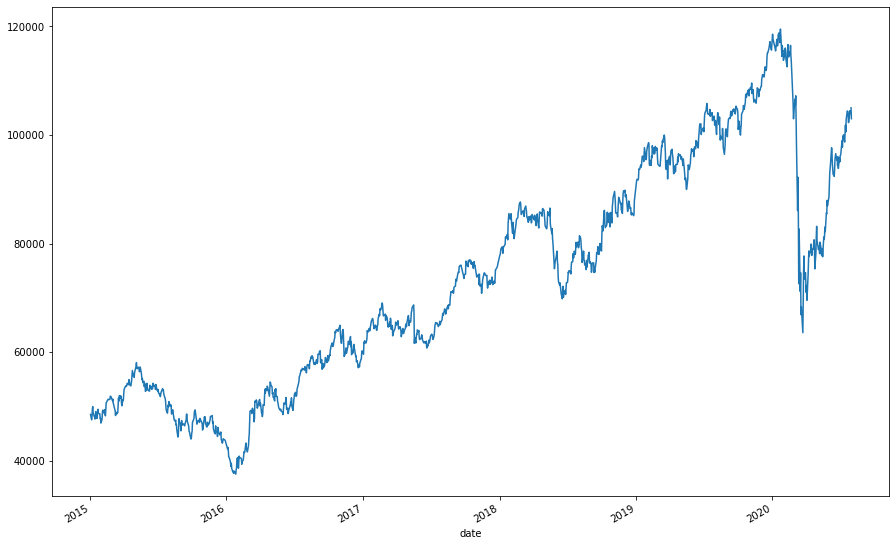

In [47]:
precos.price.plot(figsize=(15, 10))